In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import RMSprop

In [ ]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
x = X_test

11501568/11490434 [==============================] - 0s 0us/step


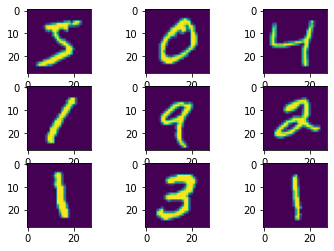

In [ ]:
for i in range(9):
    plt.subplot(330+i+1) #330 là 3 hàng 3 cột phần tử tương tác là 0, cộng từng phần tử lên đẻ xuất ra bản vẽ
    plt.imshow(X_train[i])
plt.show()

In [ ]:
X_train = X_train.reshape(60000,784) #60 ngàn tấm ảnh, kích thước 28x28 ta reshape lại thành 784
X_test = X_test.reshape(10000,784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train/=255 #chia dữ liệu về dạng 0:1 
X_test/=255

In [ ]:
Y_train = to_categorical(Y_train,10)
Y_test  = to_categorical(Y_test,10)

In [ ]:
X_train.shape
X_test.shape
Y_train.shape
Y_test.shape

(10000, 10)

In [ ]:
model=Sequential()
model.add(Dense(784,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
history = model.fit(X_train,Y_train,batch_size=128,epochs=50,verbose=1,validation_data=(X_test,Y_test)) #batch_size là 1 lần học chỉ học 180 #epochs là số lần học #verbose là hiển thị

Epoch 1/50
469/469 [==============================] - 28s 57ms/step - loss: 0.2566 - accuracy: 0.9212 - val_loss: 0.1164 - val_accuracy: 0.9654
Epoch 2/50
469/469 [==============================] - 20s 42ms/step - loss: 0.1064 - accuracy: 0.9692 - val_loss: 0.0887 - val_accuracy: 0.9732
Epoch 3/50
469/469 [==============================] - 17s 36ms/step - loss: 0.0832 - accuracy: 0.9759 - val_loss: 0.0908 - val_accuracy: 0.9752
Epoch 4/50
469/469 [==============================] - 17s 36ms/step - loss: 0.0703 - accuracy: 0.9810 - val_loss: 0.0888 - val_accuracy: 0.9775
Epoch 5/50
469/469 [==============================] - 17s 36ms/step - loss: 0.0602 - accuracy: 0.9836 - val_loss: 0.1395 - val_accuracy: 0.9744
Epoch 6/50
469/469 [==============================] - 17s 36ms/step - loss: 0.0566 - accuracy: 0.9853 - val_loss: 0.1044 - val_accuracy: 0.9789
Epoch 7/50
469/469 [==============================] - 17s 37ms/step - loss: 0.0530 - accuracy: 0.9862 - val_loss: 0.0921 - val_accuracy:

In [ ]:
#from keras.models import load_model
#model_cifar10 = load_model('CNN_cifar10.h5')
model.save('ANN_MNIST.h5')

313/313 [==============================] - 2s 5ms/step - loss: 0.2479 - accuracy: 0.9830
Test loss=  0.24789941310882568
Test accuracy=  0.9829999804496765


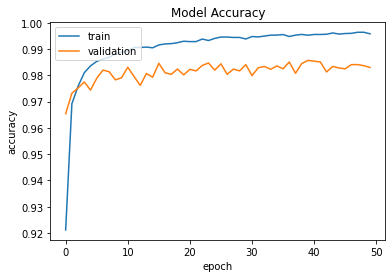

In [ ]:
score = model.evaluate(X_test,Y_test,verbose=1)
print('Test loss= ',score[0])
print('Test accuracy= ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')

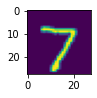

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


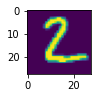

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


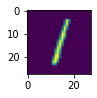

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


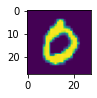

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


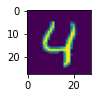

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


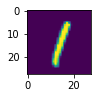

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


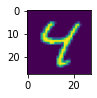

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


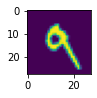

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


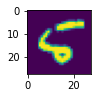

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
y_pred=model.predict(X_test)
for i in range(9):
  plt.subplot(330+i+1) #330: 3 hang 3 cot, stt di tu trai sang phai tren duoi,i=0 thi 331 phan tu tuong tac la so 1
  plt.imshow(x[i])
  plt.show()
  print(np.round(y_pred[i]))
